##Начало

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.ticker import FormatStrFormatter
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_validate,
    train_test_split,
)
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

# import missingno as msno

In [2]:
# импортирую данные и сразу преобразовываю некоторые типы данных
df = pd.read_csv(
    'data/28/df_out.csv',
    parse_dates=['posting_date'],
    dtype={'year': 'Int64', 'price': float},
)
df.head(5)

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990.0,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17 12:30:50-04:00,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942.0,2016,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03 15:40:21-04:00,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590.0,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28 03:52:20-07:00,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500.0,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17 10:08:57-04:00,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800.0,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03 18:32:06-04:00,medium,2021-05-03 22:32:06+00:00


In [3]:
df.shape

(10000, 20)

## Data Preparation

In [4]:
# ниже исследуем данные и целевую переменную
df.describe()

,id,price,year,odometer,lat,long
count,1.000000e+04,1.000000e+04,9964.0,10000.00000,9902.000000,9902.000000
mean,7.311541e+09,2.067842e+04,2010.927941,93324.13400,38.594142,-94.165877
std,4.477653e+06,1.246230e+05,9.67204,63181.17499,5.844895,18.128504
min,7.208550e+09,5.000000e+02,1915.0,0.00000,-67.144243,-158.069300
25%,7.308189e+09,7.900000e+03,2008.0,39147.25000,34.830368,-110.322086
50%,7.312757e+09,1.574950e+04,2013.0,89000.00000,39.298522,-88.000050
75%,7.315274e+09,2.799000e+04,2017.0,136875.00000,42.428070,-80.830000
max,7.317090e+09,1.234568e+07,2022.0,283466.00000,64.947500,173.885502


In [5]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
       'price_category', 'date'],
      dtype='object')

In [6]:
for i in df.columns:
    print('Характеристика: ' + i)
    print('Количество уникальных значений: ', df[i].nunique())
    print('Список значений:')
    print(df[i].value_counts())

Характеристика: id
Количество уникальных значений:  10000
Список значений:
id
7308295377    1
7316908621    1
7305833526    1
7316719384    1
7314440026    1
             ..
7305589280    1
7314411334    1
7307782698    1
7305083080    1
7311960763    1
Name: count, Length: 10000, dtype: int64
Характеристика: url
Количество уникальных значений:  10000
Список значений:
url
https://chattanooga.craigslist.org/ctd/d/chattanooga-2020-ram-2500-crew-cab-big/7308295377.html     1
https://boise.craigslist.org/ctd/d/boise-2015-volkswagen-jetta-18t-sport/7316908621.html            1
https://appleton.craigslist.org/cto/d/waupaca-1932-ford-replica-window-with/7305833526.html         1
https://goldcountry.craigslist.org/ctd/d/placerville-2017-chevy-chevrolet/7316719384.html           1
https://roanoke.craigslist.org/ctd/d/roanoke-2012-chevrolet-chevy-impala/7314440026.html            1
                                                                                                   ..
https://harri

In [7]:
df['price_category'].value_counts()
# равномерное распределение целевой переменной

price_category
high      3495
medium    3280
low       3225
Name: count, dtype: int64

### Data cleaning

####Обработка пропусков

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   url             10000 non-null  object 
 2   region          10000 non-null  object 
 3   region_url      10000 non-null  object 
 4   price           10000 non-null  float64
 5   year            9964 non-null   Int64  
 6   manufacturer    10000 non-null  object 
 7   model           9872 non-null   object 
 8   fuel            9937 non-null   object 
 9   odometer        10000 non-null  int64  
 10  title_status    9834 non-null   object 
 11  transmission    9955 non-null   object 
 12  image_url       9998 non-null   object 
 13  description     9998 non-null   object 
 14  state           10000 non-null  object 
 15  lat             9902 non-null   float64
 16  long            9902 non-null   float64
 17  posting_date    9998 non-null   

In [9]:
def print_useful_rows_info(df):
    print(
        'Количество полностью заполненных объектов из всей выборки: ', len(df.dropna())
    )
    print(
        'Процент полностью заполненных объектов из всей выборки: ',
        round(len(df.dropna()) / len(df) * 100, 2),
    )


print_useful_rows_info(df)

Количество полностью заполненных объектов из всей выборки:  9507
Процент полностью заполненных объектов из всей выборки:  95.07


In [10]:
# нахожу колонки в которых пропущены значения и их количество
columns = df.columns.to_list()


def number_of_passes(df, columns):
    list_of_passes = []
    for column in columns:
        count = df[column].isna().sum()
        if count > 0:
            list_of_passes.append([column, count])
    return list_of_passes


number_of_passes(df, columns)

[['year', 36],
 ['model', 128],
 ['fuel', 63],
 ['title_status', 166],
 ['transmission', 45],
 ['image_url', 2],
 ['description', 2],
 ['lat', 98],
 ['long', 98],
 ['posting_date', 2],
 ['date', 2]]

In [11]:
# обработка колонки year с 36 пропусками
df.year.describe()

count         9964.0
mean     2010.927941
std          9.67204
min           1915.0
25%           2008.0
50%           2013.0
75%           2017.0
max           2022.0
Name: year, dtype: Float64

In [12]:
df_clean = df.copy()
df_clean = df_clean.dropna(subset=['year'])
df_clean.shape

(9964, 20)

In [13]:
# обработка колонки model c уже 126 пропусками
df_clean.model.describe()

count      9838
unique     3446
top       f-150
freq        151
Name: model, dtype: object

In [14]:
df_clean.model.value_counts(dropna=False)

model
f-150                        151
NaN                          126
silverado 1500               110
1500                         100
camry                         77
                            ... 
sorrento lx v6                 1
sierra1500 crewcab 4x4         1
corolla se                     1
xc60 t6 inscription sport      1
a3 2.0t premium plus pzev      1
Name: count, Length: 3447, dtype: int64

In [15]:
# замена пропущенных значений на other, так как их удаление может привести к потере большого количества данных
df_clean.model = df_clean.model.fillna('other')

In [16]:
# обработка колонки fuel по принципу model
df_clean.fuel = df_clean.fuel.fillna('other')

In [17]:
# title_status
df_clean.title_status.value_counts(dropna=False)

title_status
clean         9492
rebuilt        168
NaN            159
salvage         92
lien            35
missing         16
parts only       2
Name: count, dtype: int64

In [18]:
mode = df_clean.title_status.mode()[0]  # применяю моду для заполнения пропусков
df_clean.title_status = df_clean.title_status.fillna(mode)

In [19]:
# transmission
df_clean.transmission.describe()

count          9921
unique            3
top       automatic
freq           7667
Name: transmission, dtype: object

In [20]:
df_clean.transmission.value_counts(dropna=False)

transmission
automatic    7667
other        1623
manual        631
NaN            43
Name: count, dtype: int64

In [21]:
# заполняю пропуски other
df_clean.transmission = df_clean.transmission.fillna('other')

In [22]:
# проверяю сколько осталось после редактирования колонок с пропусками
number_of_passes(df_clean, columns)

[['lat', 96], ['long', 96]]

In [23]:
df[df['lat'].isna()]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
118,7312692841,https://tricities.craigslist.org/ctd/d/bmw-ser...,tri-cities,https://tricities.craigslist.org,17998.0,2012,bmw,5 series,gas,62665,clean,automatic,https://images.craigslist.org/00909_57Xyuj8AJH...,2012 BMW 5 Series 535i M Sport Heat & Cool Sea...,tn,NaN,NaN,2021-04-26 04:28:35-04:00,medium,2021-04-26 08:28:35+00:00
126,7315526339,https://newjersey.craigslist.org/ctd/d/look-wh...,north jersey,https://newjersey.craigslist.org,22995.0,2014,bmw,7 series,gas,81085,clean,automatic,https://images.craigslist.org/00k0k_38TNTakyUf...,2014 BMW 7 Series 4dr Sdn 750Li xDrive AWD Aut...,nj,NaN,NaN,2021-05-01 17:49:09-04:00,high,2021-05-01 21:49:09+00:00
502,7308641593,https://winstonsalem.craigslist.org/ctd/d/ford...,winston-salem,https://winstonsalem.craigslist.org,20998.0,2016,ford,transit cargo,gas,123825,clean,automatic,https://images.craigslist.org/00101_gwJT4WBNRo...,2016 Ford Transit Cargo Vans Work Van High Roo...,nc,NaN,NaN,2021-04-18 04:43:46-04:00,medium,2021-04-18 08:43:46+00:00
567,7309282242,https://onslow.craigslist.org/ctd/d/mercedes-b...,jacksonville,https://onslow.craigslist.org,10810.0,2014,mercedes-benz,c-class,gas,124476,clean,automatic,https://images.craigslist.org/01414_6jNHxQwrKx...,2014 Mercedes Benz C Class C 250 Sport Coupe C...,nc,NaN,NaN,2021-04-19 12:06:28-04:00,medium,2021-04-19 16:06:28+00:00
692,7314847134,https://atlanta.craigslist.org/atl/ctd/d/2008-...,atlanta,https://atlanta.craigslist.org,17900.0,2008,toyota,tundra,gas,96000,clean,automatic,https://images.craigslist.org/01313_6u7l4KgvV4...,Description: 2008 Toyota Tundra 5...,ga,NaN,NaN,2021-04-30 12:09:49-04:00,medium,2021-04-30 16:09:49+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9388,7208549803,https://bellingham.craigslist.org/ctd/d/bellin...,bellingham,https://bellingham.craigslist.org,11999.0,<NA>,other,NaN,NaN,95674,NaN,NaN,NaN,NaN,wa,NaN,NaN,NaT,medium,NaN
9408,7311736404,https://raleigh.craigslist.org/ctd/d/lexus-nx-...,raleigh / durham / CH,https://raleigh.craigslist.org,28998.0,2018,lexus,nx 300,gas,19863,clean,automatic,https://images.craigslist.org/00Q0Q_j7S3aRy6Sw...,2018 Lexus NX 300 Navigation Sunroof Bluetooth...,nc,NaN,NaN,2021-04-24 00:54:33-04:00,high,2021-04-24 04:54:33+00:00
9650,7315596665,https://newjersey.craigslist.org/ctd/d/wow-201...,north jersey,https://newjersey.craigslist.org,16495.0,2013,jeep,grand cherokee,other,90878,clean,automatic,https://images.craigslist.org/00v0v_awwo3NjD7Q...,2013 Jeep Grand Cherokee 4WD 4dr Laredo Automa...,nj,NaN,NaN,2021-05-01 20:53:57-04:00,medium,2021-05-02 00:53:57+00:00
9668,7308677951,https://myrtlebeach.craigslist.org/ctd/d/ford-...,myrtle beach,https://myrtlebeach.craigslist.org,33647.0,2015,ford,f-250 super duty,diesel,153524,clean,automatic,https://images.craigslist.org/00f0f_1c0aGXmmCL...,2015 Ford F250 4x4 Truck Diesel Pickup Trucks ...,sc,NaN,NaN,2021-04-18 08:43:25-04:00,high,2021-04-18 12:43:25+00:00


In [24]:
# исходя из предыдущих работ принимаю решение также удалить столбцы с нулевым lat и long
df_clean = df_clean.dropna(subset=['lat', 'long'])

In [25]:
# делаю итоговую проверку на пропуски для всего датафрейма
print_useful_rows_info(df_clean)

Количество полностью заполненных объектов из всей выборки:  9868
Процент полностью заполненных объектов из всей выборки:  100.0


####Преобразование типов данных

In [26]:
# тип топлива и коробки передач преобразуем в категории
df_clean.fuel = df_clean.fuel.astype('category')
df_clean.transmission = df_clean.transmission.astype('category')
df_clean['date'] = pd.to_datetime(df_clean['date'])

In [27]:
# проверяю
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9868 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   id              9868 non-null   int64              
 1   url             9868 non-null   object             
 2   region          9868 non-null   object             
 3   region_url      9868 non-null   object             
 4   price           9868 non-null   float64            
 5   year            9868 non-null   Int64              
 6   manufacturer    9868 non-null   object             
 7   model           9868 non-null   object             
 8   fuel            9868 non-null   category           
 9   odometer        9868 non-null   int64              
 10  title_status    9868 non-null   object             
 11  transmission    9868 non-null   category           
 12  image_url       9868 non-null   object             
 13  description     9868 non-null   object

####Обработка аномалий

In [28]:
df_clean.year.describe()

count         9868.0
mean     2010.909708
std         9.705988
min           1915.0
25%           2008.0
50%           2013.0
75%           2017.0
max           2022.0
Name: year, dtype: Float64

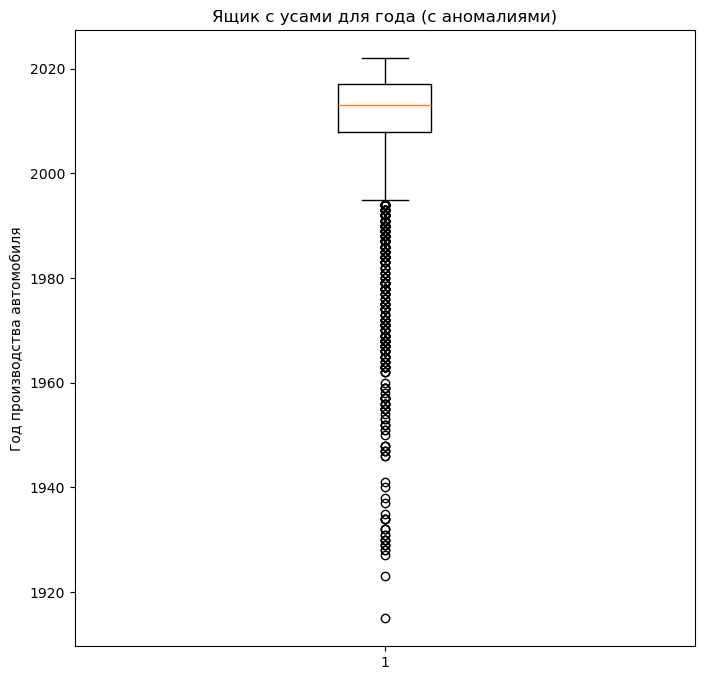

In [29]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.boxplot(df_clean.year)
ax.set_ylabel('Год производства автомобиля')
ax.set_title('Ящик с усами для года (с аномалиями)')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [30]:
def calulate_outliers(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries


boundaries = calulate_outliers(df_clean.year)
boundaries

(1994.5, 2030.5)

In [31]:
is_outlier_year = (df_clean.year < boundaries[0]) | (df_clean.year > boundaries[1])
is_outlier_year

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Name: year, Length: 9868, dtype: boolean

In [32]:
df_clean[is_outlier_year]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
13,7317089086,https://seattle.craigslist.org/see/ctd/d/portl...,seattle-tacoma,https://seattle.craigslist.org,14995.0,1994,ford,e-series van universal by glaval designer luxu...,gas,156925,clean,automatic,https://images.craigslist.org/00r0r_13JUlXZOMl...,"Priced to Sell: $14,9951994 Ford E-Series Van ...",wa,45.391373,-122.613533,2021-05-04 20:22:11-07:00,medium,2021-05-05 03:22:11+00:00
21,7312327909,https://madison.craigslist.org/cto/d/madison-1...,madison,https://madison.craigslist.org,89995.0,1970,other,oldsmobile 442,gas,111111,clean,automatic,https://images.craigslist.org/00S0S_agk7Nol4CO...,1970 Oldsmobile 442 Convertible 442 Indy Pace ...,wi,43.098400,-89.273400,2021-04-25 10:10:43-05:00,high,2021-04-25 15:10:43+00:00
57,7314413105,https://inlandempire.craigslist.org/ctd/d/cost...,inland empire,https://inlandempire.craigslist.org,69888.0,1948,ford,coe,gas,1,clean,automatic,https://images.craigslist.org/00M0M_8jgBCZZuG6...,Awesome Resto-Mod COE Ford Car Hauler. Equippe...,ca,33.680100,-117.908500,2021-04-29 10:49:29-07:00,high,2021-04-29 17:49:29+00:00
66,7310077530,https://hudsonvalley.craigslist.org/cto/d/bloo...,hudson valley,https://hudsonvalley.craigslist.org,5500.0,1990,other,Diahatsu,gas,30000,clean,manual,https://images.craigslist.org/00T0T_a4VRbx40ea...,1991 Daihatsu hijet 5 speed extended cab....im...,ny,41.564400,-74.430400,2021-04-20 18:30:18-04:00,low,2021-04-20 22:30:18+00:00
106,7314527175,https://rapidcity.craigslist.org/ctd/d/sherman...,rapid city / west SD,https://rapidcity.craigslist.org,43500.0,1968,chevrolet,camaro,gas,43320,clean,manual,https://images.craigslist.org/00h0h_2N66LMJBAI...,1968 Chevrolet Camaro Convertible. VIN:124678N...,sd,33.637200,-96.618400,2021-04-29 15:11:01-06:00,high,2021-04-29 21:11:01+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9886,7313487583,https://springfield.craigslist.org/cto/d/mount...,springfield,https://springfield.craigslist.org,3500.0,1974,jeep,cj5,gas,10000,clean,manual,https://images.craigslist.org/00G0G_cdxzaTaVqa...,1974 Jeep cj5 304 v8 4speed manual trans Da...,mo,36.331200,-92.375300,2021-04-27 14:30:28-05:00,low,2021-04-27 19:30:28+00:00
9921,7311566144,https://chico.craigslist.org/cto/d/chico-1994-...,chico,https://chico.craigslist.org,16000.0,1994,ford,f250,gas,32500,clean,automatic,https://images.craigslist.org/01010_343KkgTaHo...,"Up for sale is this 32,000 original mile Ford ...",ca,39.745800,-121.844400,2021-04-23 13:51:20-07:00,medium,2021-04-23 20:51:20+00:00
9944,7313676859,https://reno.craigslist.org/ctd/d/sherman-1984...,reno / tahoe,https://reno.craigslist.org,26500.0,1984,chevrolet,silverado,gas,38751,clean,automatic,https://images.craigslist.org/00r0r_czXfi4UeJF...,"1984 Chevrolet C10 Silverado, short wheelbase ...",ca,33.637200,-96.618400,2021-04-27 19:44:27-07:00,high,2021-04-28 02:44:27+00:00
9972,7316458200,https://portland.craigslist.org/mlt/cto/d/port...,portland,https://portland.craigslist.org,18500.0,1972,chevrolet,other,gas,75000,clean,automatic,https://images.craigslist.org/00x0x_7FqS8iHJst...,1972 classic Chevrolet pick up custom deluxe ...,or,45.494960,-122.666988,2021-05-03 14:58:34-07:00,medium,2021-05-03 21:58:34+00:00


In [33]:
df_clean[is_outlier_year].price_category.value_counts()

price_category
low       181
medium    135
high       78
Name: count, dtype: int64

In [34]:
df_clean.loc[is_outlier_year, 'year'] = int(boundaries[0])
df_clean.year.describe()

count         9868.0
mean     2011.658391
std         6.530991
min           1994.0
25%           2008.0
50%           2013.0
75%           2017.0
max           2022.0
Name: year, dtype: Float64

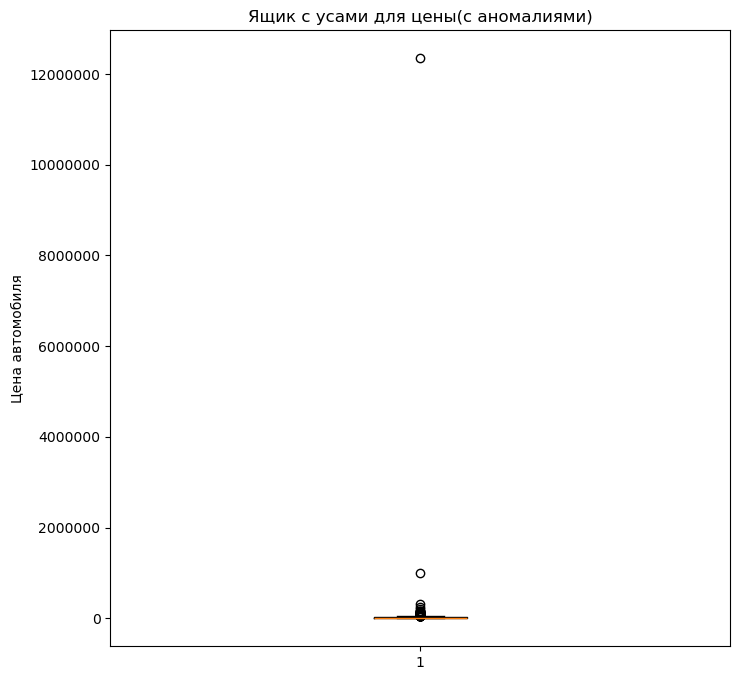

In [35]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.boxplot(df_clean.price)
ax.set_ylabel('Цена автомобиля')
ax.set_title('Ящик с усами для цены(с аномалиями)')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [36]:
boundaries = calulate_outliers(df_clean.price)
boundaries

(-22485.0, 58275.0)

In [37]:
is_outlier_price = (df_clean.price < boundaries[0]) | (df_clean.price > boundaries[1])
df_clean[is_outlier_price]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
21,7312327909,https://madison.craigslist.org/cto/d/madison-1...,madison,https://madison.craigslist.org,89995.0,1994,other,oldsmobile 442,gas,111111,clean,automatic,https://images.craigslist.org/00S0S_agk7Nol4CO...,1970 Oldsmobile 442 Convertible 442 Indy Pace ...,wi,43.098400,-89.273400,2021-04-25 10:10:43-05:00,high,2021-04-25 15:10:43+00:00
33,7304521734,https://kpr.craigslist.org/ctd/d/pasco-2019-fo...,kennewick-pasco-richland,https://kpr.craigslist.org,79999.0,2019,ford,f450 deisel power stroke,diesel,41759,clean,automatic,https://images.craigslist.org/00D0D_ctOGGthFxQ...,2019 Ford F450 Lariat FX4 Dually 4x4 **Clean C...,wa,46.234838,-119.128015,2021-04-09 19:46:04-07:00,high,2021-04-10 02:46:04+00:00
57,7314413105,https://inlandempire.craigslist.org/ctd/d/cost...,inland empire,https://inlandempire.craigslist.org,69888.0,1994,ford,coe,gas,1,clean,automatic,https://images.craigslist.org/00M0M_8jgBCZZuG6...,Awesome Resto-Mod COE Ford Car Hauler. Equippe...,ca,33.680100,-117.908500,2021-04-29 10:49:29-07:00,high,2021-04-29 17:49:29+00:00
96,7311450619,https://wenatchee.craigslist.org/ctd/d/kittita...,wenatchee,https://wenatchee.craigslist.org,58995.0,2020,jeep,wrangler,gas,17799,clean,automatic,https://images.craigslist.org/00a0a_chVstv8e4Z...,ＷＩＮＤＹ ＣＨＥＶＲＯＬＥＴ ⭐ No Payments For 90 Days* ⭐...,wa,46.999600,-120.516300,2021-04-23 10:43:27-07:00,high,2021-04-23 17:43:27+00:00
144,7305640478,https://siouxfalls.craigslist.org/ctd/d/gilber...,sioux falls / SE SD,https://siouxfalls.craigslist.org,59900.0,2014,ford,f550 xl,diesel,156000,clean,automatic,https://images.craigslist.org/00x0x_httQ0BwNkq...,**FOR SALE** 2014 Ford F550 Super Duty 45' Al...,sd,42.117274,-88.436783,2021-04-12 10:34:12-05:00,high,2021-04-12 15:34:12+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9926,7316447901,https://tulsa.craigslist.org/cto/d/tulsa-2017-...,tulsa,https://tulsa.craigslist.org,65000.0,2017,rover,other,gas,47000,clean,automatic,https://images.craigslist.org/00s0s_iGpmplDL99...,"2017 Range Rover HSE, supercharged V8, silver ...",ok,36.126200,-95.940800,2021-05-03 16:37:36-05:00,high,2021-05-03 21:37:36+00:00
9955,7315493686,https://palmsprings.craigslist.org/ctd/d/fonta...,palm springs,https://palmsprings.craigslist.org,68995.0,2016,ram,2500,diesel,61130,clean,automatic,https://images.craigslist.org/00p0p_5PdfAkd0AM...,2016 Ram 2500 Laramie Offered by: R&B Auto...,ca,34.107220,-117.455310,2021-05-01 13:40:57-07:00,high,2021-05-01 20:40:57+00:00
9971,7314385254,https://spokane.craigslist.org/ctd/d/puyallup-...,spokane / coeur d'alene,https://spokane.craigslist.org,86977.0,2017,ford,f450 super duty crew cab,diesel,16806,clean,automatic,https://images.craigslist.org/00H0H_5P0NdUIgHi...,2017 *** Ford F450 Super Duty Crew Cab Platinu...,id,47.197304,-122.291776,2021-04-29 10:03:19-07:00,high,2021-04-29 17:03:19+00:00
9978,7307184389,https://holland.craigslist.org/ctd/d/otsego-20...,holland,https://holland.craigslist.org,61022.0,2020,gmc,sierra 1500,gas,5894,clean,automatic,https://images.craigslist.org/00i0i_64FIhCkyTb...,"2020 GMC Sierra 1500 AT4 -- $61,022 ☎ Call ...",mi,42.448987,-85.661948,2021-04-15 11:05:47-04:00,high,2021-04-15 15:05:47+00:00


In [38]:
df_clean.loc[is_outlier_price, 'price'] = int(boundaries[0])

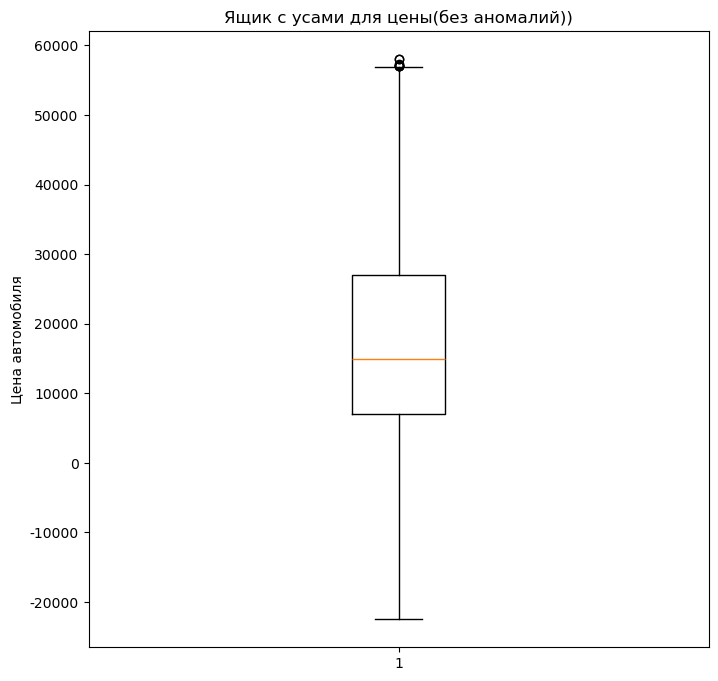

In [39]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.boxplot(df_clean.price)
ax.set_ylabel('Цена автомобиля')
ax.set_title('Ящик с усами для цены(без аномалий))')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [40]:
boundaries = calulate_outliers(df_clean.odometer)
boundaries

(-107666.125, 284116.875)

In [41]:
df_clean.odometer.describe()

count      9868.000000
mean      93647.193048
std       63260.139717
min           0.000000
25%       39252.500000
50%       89116.000000
75%      137198.250000
max      283466.000000
Name: odometer, dtype: float64

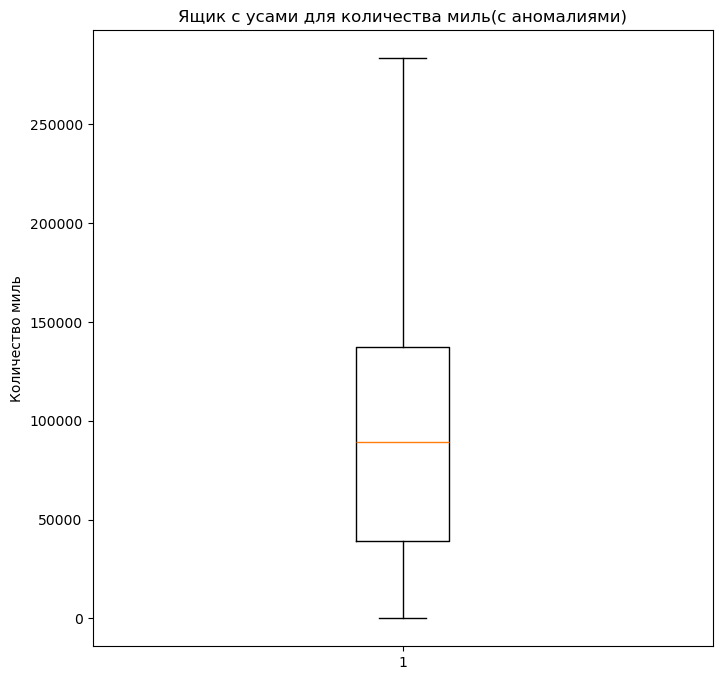

In [42]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.boxplot(df_clean.odometer)
ax.set_ylabel('Количество миль')
ax.set_title('Ящик с усами для количества миль(с аномалиями)')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [43]:
is_outlier_odometer = (df_clean.odometer < boundaries[0]) | (
    df_clean.odometer > boundaries[1]
)

In [44]:
df_clean[is_outlier_odometer]  # здесь аномалий нет

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date


## Feature Engineering

In [45]:
# удаляю колонку с ссылками и создаю новые признаки
df_clean = df_clean.drop(['url'], axis=1)
df_clean['short_model'] = df_clean.model.apply(lambda x: x.split(' ')[0])
df_clean['odometer/price'] = df_clean.apply(lambda x: x.odometer / x.price, axis=1)
df_clean['age_category'] = df_clean.apply(
    lambda x: 'new' if x.year > 2013 else ('old' if x.year < 2006 else 'average'),
    axis=1,
)
df_clean['model_len'] = df_clean.model.apply(lambda x: len(x))
df_clean['region_corrected'] = df_clean['region'].apply(
    lambda x: x.lower().split('/')[0].replace(' ', '').replace('-', '')
)
df_clean['model_in_desc'] = df_clean.apply(
    lambda x: x.description.count(x.model), axis=1
)
df_clean['desc_len'] = df_clean.apply(lambda x: len(x.description), axis=1)
df_clean['region_new'] = df_clean.region_url.apply(
    lambda x: x.lower().split('://')[1].split('.')[0]
)
df_clean['manufacturer_model'] = df_clean.manufacturer + ': ' + df_clean.model

df_clean['posting_date'] = pd.to_datetime(
    df_clean['posting_date'], utc=True
)  # преобразовываю время размещения в тип дата
df_clean['month'] = df_clean.posting_date.apply(lambda x: x.month)
df_clean['dayofweek'] = df_clean.posting_date.dt.dayofweek
df_clean['diff_years'] = df_clean['date'].dt.year - df_clean['year']

In [47]:
# преобразовываю категориальные переменные
categories = [
    'short_model',
    'transmission',
    'region',
    'manufacturer',
    'state',
    'title_status',
    'age_category',
]
data = df_clean[categories]

ohe = OneHotEncoder(sparse_output=False)
ohe.fit(data[categories])
ohe_data = ohe.transform(data[categories])
columns2 = ohe.get_feature_names_out()
data[columns2] = pd.DataFrame(ohe_data)
data.head()

/tmp/ipykernel_2619/747623582.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns2] = pd.DataFrame(ohe_data)
/tmp/ipykernel_2619/747623582.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columns2] = pd.DataFrame(ohe_data)
/tmp/ipykernel_2619/747623582.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,short_model,transmission,region,manufacturer,state,title_status,age_category,short_model_-benz,short_model_1,short_model_124,...,state_wy,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,age_category_average,age_category_new,age_category_old
0,2500,other,chattanooga,ram,tn,clean,new,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,explorer,automatic,north jersey,ford,nj,clean,new,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,golf,other,reno / tahoe,volkswagen,ca,clean,new,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,rav4,automatic,fayetteville,toyota,nc,clean,average,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,altima,automatic,new york city,nissan,ny,clean,new,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
df_clean = df_clean.reset_index(drop=True)
data = data.reset_index(drop=True)


In [51]:
df_clean = pd.concat([df_clean, data], axis=1)
df_clean.head()

,id,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,...,state_wy,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage,age_category_average,age_category_new,age_category_old
0,7308295377,chattanooga,https://chattanooga.craigslist.org,54990.0,2020,ram,2500 crew cab big horn,diesel,27442,clean,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,7316380095,north jersey,https://newjersey.craigslist.org,16942.0,2016,ford,explorer 4wd 4dr xlt,other,60023,clean,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,7313733749,reno / tahoe,https://reno.craigslist.org,35590.0,2017,volkswagen,golf r hatchback,gas,14048,clean,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,7308210929,fayetteville,https://fayetteville.craigslist.org,14500.0,2013,toyota,rav4,gas,117291,clean,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,7316474668,new york city,https://newyork.craigslist.org,21800.0,2021,nissan,altima,gas,8000,clean,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [52]:
# стандартизирую количественные переменные, временные, целочисленные и с плавающей запятой
qua_variables = [
    'lat',
    'long',
    'year',
    'odometer/price',
    'desc_len',
    'model_in_desc',
    'diff_years',
    'dayofweek',
    'month',
]
data2 = df_clean[qua_variables]
std_scaler = StandardScaler()
std_scaler.fit(data2)
std_scaler_qua_variables = std_scaler.transform(data2)
names = [name + '_std' for name in qua_variables]
data2 = pd.DataFrame(std_scaler_qua_variables, columns=names)

df_clean = df_clean.reset_index(drop=True)
data2 = data2.reset_index(drop=True)
df_clean = pd.concat([df_clean, data2], axis=1)

scaler = StandardScaler()

num_col = df_clean.select_dtypes(include=['float64', 'int64']).columns
df_clean[num_col] = scaler.fit_transform(df_clean[num_col])

In [53]:
# нормализуем колонки lat и long
df_clean2 = df[['lat', 'long']]
mm_scaler = MinMaxScaler()
mm_scaler.fit(df_clean2)
mm_scaler_ll = mm_scaler.transform(df_clean2)
df_clean3 = pd.DataFrame(mm_scaler_ll, columns=['lat_mm', 'long_mm'])
df_clean = df_clean.reset_index(drop=True)
df_clean3 = df_clean3.reset_index(drop=True)

df_clean = pd.concat([df_clean, df_clean3], axis=1)
df_clean.head()

,id,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,...,long_std,year_std,odometer/price_std,desc_len_std,model_in_desc_std,diff_years_std,dayofweek_std,month_std,lat_mm,long_mm
0,-0.747230,chattanooga,https://chattanooga.craigslist.org,2.761999,1.277300,ram,2500 crew cab big horn,diesel,-1.046608,clean,...,0.490197,1.277300,-0.500085,0.614566,-0.157005,-1.277300,1.118386,-0.614207,0.773737,0.219365
1,1.105995,north jersey,https://newjersey.craigslist.org,-0.017993,0.664804,ford,explorer 4wd 4dr xlt,other,-0.531550,clean,...,1.107218,0.664804,-0.391654,-0.651046,-0.157005,-0.664804,-1.376467,1.628115,0.817357,0.253069
2,0.499385,reno / tahoe,https://reno.craigslist.org,1.344530,0.817928,volkswagen,golf r hatchback,gas,-1.258347,clean,...,0.536423,0.817928,-0.503802,0.543974,-0.157005,-0.817928,-0.378526,-0.614207,0.764041,0.221890
3,-0.766587,fayetteville,https://fayetteville.craigslist.org,-0.196419,0.205432,toyota,rav4,gas,0.373774,clean,...,0.853895,0.205432,-0.229703,0.167604,-0.157005,-0.205432,1.118386,-0.614207,0.778703,0.239231
4,1.127673,new york city,https://newyork.craigslist.org,0.336958,1.430424,nissan,altima,gas,-1.353957,clean,...,1.132161,1.430424,-0.504790,-0.805916,-0.157005,-1.430424,-1.376467,1.628115,0.816092,0.254431


In [54]:
# нахожу дубли столбцов
# def getDuplicateColumns(df):
#     duplicateColumnNames = set()
#     for x in range(df.shape[1]):
#         col = df.iloc[:, x]
#         for y in range(x + 1, df.shape[1]):
#             otherCol = df.iloc[:, y]
#             if col.equals(otherCol):
#                 duplicateColumnNames.add(df.columns.values[y])
#     return list(duplicateColumnNames)

def get_duplicate_columns(df):
    seen = {}
    duplicate_columns = []

    for col in df.columns:
        col_hash = pd.util.hash_pandas_object(df[col]).sum()
        
        if col_hash in seen:
            duplicate_columns.append(col)
        else:
            seen[col_hash] = col

    return duplicate_columns


duplicate_cols = get_duplicate_columns(df_clean)
duplicate_cols

['date',
 'short_model',
 'transmission',
 'region',
 'manufacturer',
 'state',
 'title_status',
 'age_category',
 'short_model_e',
 'short_model_gl',
 'short_model_m35s',
 'short_model_s2000',
 'manufacturer_alfa-romeo',
 'manufacturer_datsun',
 'manufacturer_harley-davidson',
 'state_dc',
 'state_de',
 'state_hi',
 'state_me',
 'state_nh',
 'state_ri',
 'state_vt',
 'state_wy']

In [55]:
df_clean[duplicate_cols]

,date,short_model,short_model,transmission,transmission,region,region,manufacturer,manufacturer,state,...,manufacturer_datsun,manufacturer_harley-davidson,state_dc,state_de,state_hi,state_me,state_nh,state_ri,state_vt,state_wy
0,2021-04-17 16:30:50+00:00,2500,2500,other,other,chattanooga,chattanooga,ram,ram,tn,...,-0.014333,-0.017555,-0.083857,-0.043033,-0.073271,-0.082606,-0.081974,-0.08509,-0.080048,-0.036562
1,2021-05-03 19:40:21+00:00,explorer,explorer,automatic,automatic,north jersey,north jersey,ford,ford,nj,...,-0.014333,-0.017555,-0.083857,-0.043033,-0.073271,-0.082606,-0.081974,-0.08509,-0.080048,-0.036562
2,2021-04-28 10:52:20+00:00,golf,golf,other,other,reno / tahoe,reno / tahoe,volkswagen,volkswagen,ca,...,-0.014333,-0.017555,-0.083857,-0.043033,-0.073271,-0.082606,-0.081974,-0.08509,-0.080048,-0.036562
3,2021-04-17 14:08:57+00:00,rav4,rav4,automatic,automatic,fayetteville,fayetteville,toyota,toyota,nc,...,-0.014333,-0.017555,-0.083857,-0.043033,-0.073271,-0.082606,-0.081974,-0.08509,-0.080048,-0.036562
4,2021-05-03 22:32:06+00:00,altima,altima,automatic,automatic,new york city,new york city,nissan,nissan,ny,...,-0.014333,-0.017555,-0.083857,-0.043033,-0.073271,-0.082606,-0.081974,-0.08509,-0.080048,-0.036562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9998,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# удаляю их и проверяю результат
df_drop = df_clean.copy()
df_drop2 = df_drop.T.drop_duplicates().T
# getDuplicateColumns(df_drop2)

In [57]:
# удаляю пустые строки и неинформативные значения
df_clean = df_drop2
df_clean = df_clean.dropna()
df_clean.head()

,id,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,...,long_std,year_std,odometer/price_std,desc_len_std,model_in_desc_std,diff_years_std,dayofweek_std,month_std,lat_mm,long_mm
0,-0.74723,chattanooga,https://chattanooga.craigslist.org,2.761999,1.2773,ram,2500 crew cab big horn,diesel,-1.046608,clean,...,0.490197,1.2773,-0.500085,0.614566,-0.157005,-1.2773,1.118386,-0.614207,0.773737,0.219365
1,1.105995,north jersey,https://newjersey.craigslist.org,-0.017993,0.664804,ford,explorer 4wd 4dr xlt,other,-0.53155,clean,...,1.107218,0.664804,-0.391654,-0.651046,-0.157005,-0.664804,-1.376467,1.628115,0.817357,0.253069
2,0.499385,reno / tahoe,https://reno.craigslist.org,1.34453,0.817928,volkswagen,golf r hatchback,gas,-1.258347,clean,...,0.536423,0.817928,-0.503802,0.543974,-0.157005,-0.817928,-0.378526,-0.614207,0.764041,0.22189
3,-0.766587,fayetteville,https://fayetteville.craigslist.org,-0.196419,0.205432,toyota,rav4,gas,0.373774,clean,...,0.853895,0.205432,-0.229703,0.167604,-0.157005,-0.205432,1.118386,-0.614207,0.778703,0.239231
4,1.127673,new york city,https://newyork.craigslist.org,0.336958,1.430424,nissan,altima,gas,-1.353957,clean,...,1.132161,1.430424,-0.50479,-0.805916,-0.157005,-1.430424,-1.376467,1.628115,0.816092,0.254431


In [58]:
df_clean['id'] = df_clean['id'].astype(int)
df_clean['price'] = df_clean['price'].astype(int)

/tmp/ipykernel_2619/736408922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['id'] = df_clean['id'].astype(int)
/tmp/ipykernel_2619/736408922.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['price'] = df_clean['price'].astype(int)


In [59]:
columns_for_drop = [
    'year',
    'region',
    'region_url',
    'manufacturer',
    'model',
    'fuel',
    'odometer',
    'title_status',
    'transmission',
    'image_url',
    'description',
    'state',
    'lat',
    'long',
    'posting_date',
    'odometer/price',
    'region_new',
    'region_corrected',
    'manufacturer_model',
    'desc_len',
    'model_in_desc',
    'model_len',
    'age_category',
    'short_model',
    'lat_mm',
    'long_mm',
    'month',
    'dayofweek',
    'diff_years',
]
df_prepared = df_clean.drop(columns_for_drop, axis=1)
df_prepared.head()

,id,price,price_category,short_model_-benz,short_model_1,short_model_124,short_model_128i,short_model_135i,short_model_1500,short_model_163869,...,age_category_old,lat_std,long_std,year_std,odometer/price_std,desc_len_std,model_in_desc_std,diff_years_std,dayofweek_std,month_std
0,0,2,high,-0.010134,-0.037944,-0.010134,-0.010134,-0.014333,-0.145911,-0.010134,...,-0.446883,-0.606074,0.490197,1.2773,-0.500085,0.614566,-0.157005,-1.2773,1.118386,-0.614207
1,1,0,medium,-0.010134,-0.037944,-0.010134,-0.010134,-0.014333,-0.145911,-0.010134,...,-0.446883,0.379625,1.107218,0.664804,-0.391654,-0.651046,-0.157005,-0.664804,-1.376467,1.628115
2,0,1,high,-0.010134,-0.037944,-0.010134,-0.010134,-0.014333,-0.145911,-0.010134,...,-0.446883,-0.825185,0.536423,0.817928,-0.503802,0.543974,-0.157005,-0.817928,-0.378526,-0.614207
3,0,0,medium,-0.010134,-0.037944,-0.010134,-0.010134,-0.014333,-0.145911,-0.010134,...,-0.446883,-0.493857,0.853895,0.205432,-0.229703,0.167604,-0.157005,-0.205432,1.118386,-0.614207
4,1,0,medium,-0.010134,-0.037944,-0.010134,-0.010134,-0.014333,-0.145911,-0.010134,...,-0.446883,0.351055,1.132161,1.430424,-0.50479,-0.805916,-0.157005,-1.430424,-1.376467,1.628115


In [60]:
print(df_prepared.shape)

(9641, 1463)


## Modelling

In [64]:
# формируем датасет для обучения моделей
# разделяем выборку, отделяем целевую переменную
# df = pd.read_csv('data/28/vehicles_dataset_prepared.csv')
df = df_prepared.copy()
scaler = StandardScaler()

num_col = df.select_dtypes(include=['float64', 'int64']).columns
df[num_col] = scaler.fit_transform(df[num_col])

df_prepared = df.copy()
df_prepared = df_prepared.drop(['price', 'odometer/price_std', 'id'], axis=1)

In [70]:
x = df_prepared.drop(['price_category'], axis=1)
y = df_prepared['price_category']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)

### LogisticRegression

In [71]:
lr = LogisticRegression(max_iter=500)
lr.fit(x_train, y_train)
pred_train_lr = lr.predict(x_train)
pred_test_lr = lr.predict(x_test)
print(accuracy_score(y_train, pred_train_lr))
print(accuracy_score(y_test, pred_test_lr))

0.6997628927089508
0.5281714483235396


### RandomForestClassifier

In [72]:
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

predicted_train_rf = rf_clf.predict(x_train)
predicted_test_rf = rf_clf.predict(x_test)

print(accuracy_score(y_train, predicted_train_rf))
print(accuracy_score(y_test, predicted_test_rf))

1.0
0.6349809885931559


### MLPClassifier

In [73]:
mlp = MLPClassifier(random_state=12, max_iter=500)

mlp.fit(x_train, y_train)
predicted_train_mlp = mlp.predict(x_train)
predicted_test_mlp = mlp.predict(x_test)

print(accuracy_score(y_train, predicted_train_mlp))
print(accuracy_score(y_test, predicted_test_mlp))

0.9992590397154713
0.4690632561354995


## Results